# Trade income vs. Climate variability

**Hypothesis:** Settlements grow until they can take part in trading - this generates additional income. At a certain value of the Income from trade, this income must suffice to sustain the population of trading settlements.
At the verge of this parameter value, variability in the other sources of income can push settlements below the threshold for trading, leading to a cascading falure in the trade network.

To thest this, I vary the parameters for trade income and climate variability and see, if there is a value for the treade income that leads to big spreads in trajectories for different climate varability.

In [84]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

test = False

location = '/home/jakob/Project_MayaSim/output_data/X5_trade/results/trajectory'
if test:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X5_trade/results/traders_trajectory'
    
data = pd.read_pickle(location)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))

trade_strengths = lvs[1].values
print(trade_strengths)

Populating the interactive namespace from numpy and matplotlib
[  5000.   6000.   7000.   8000.   9000.  10000.]


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
def plotlines(data, level, key, unstack, legend=True):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls, legend=legend)
    if legend:
        lg = ln.get_legend()
        bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
        xOffset = .5
        bb.x0 += xOffset
        bb.x1 += xOffset
        lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

In [86]:
data.head()

key                                                                mean_trajectories  \
precip_amplitude r_trade kill_cropless timesteps observables                           
0.0              5000.0  False         0         max_AG                   762.942327   
                                                 max_ES                   191.200599   
                                                 max_bca                 1076.893236   
                                                 max_cluster_size           1.000000   
                                                 max_npp                 2444.397120   

key                                                                sigma_trajectories  
precip_amplitude r_trade kill_cropless timesteps observables                           
0.0              5000.0  False         0         max_AG                           0.0  
                                                 max_ES                           0.0  
                                                 max_bca                          0.0  
                                                 max_cluster_size                 0.0  
                                                 max_npp                          0.0

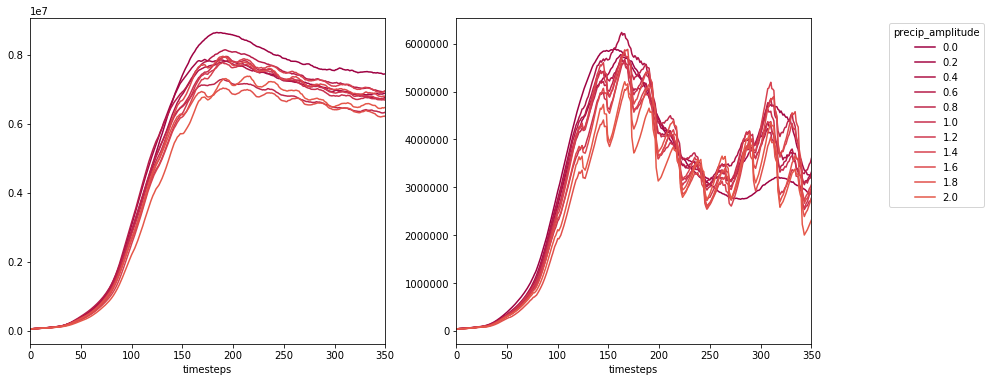

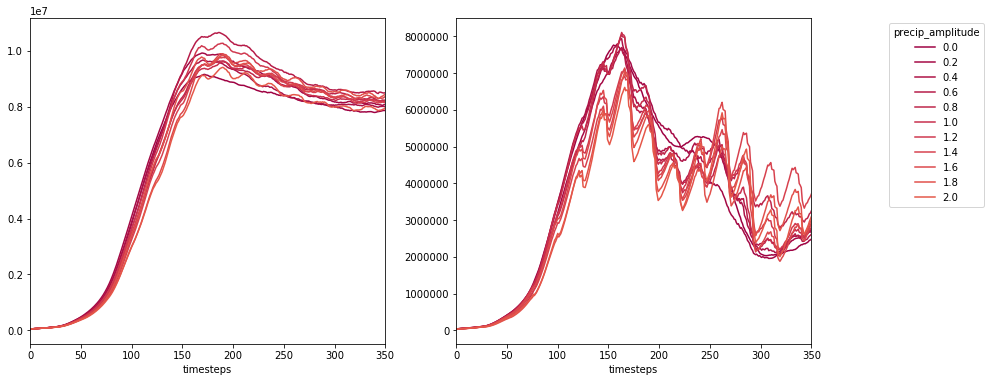

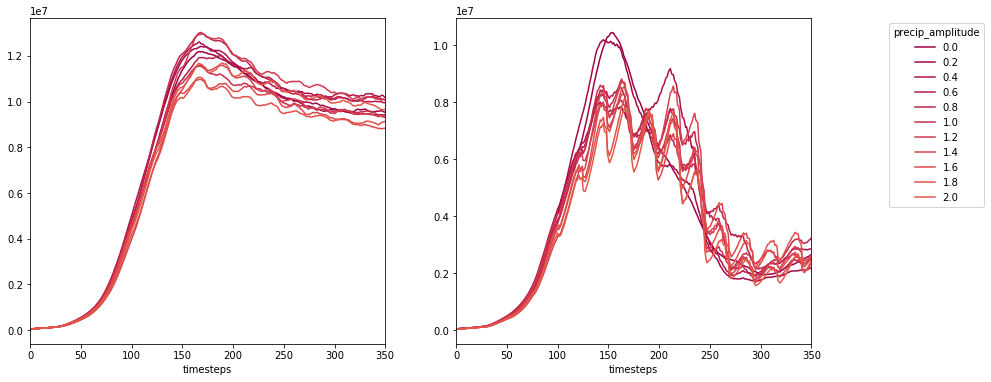

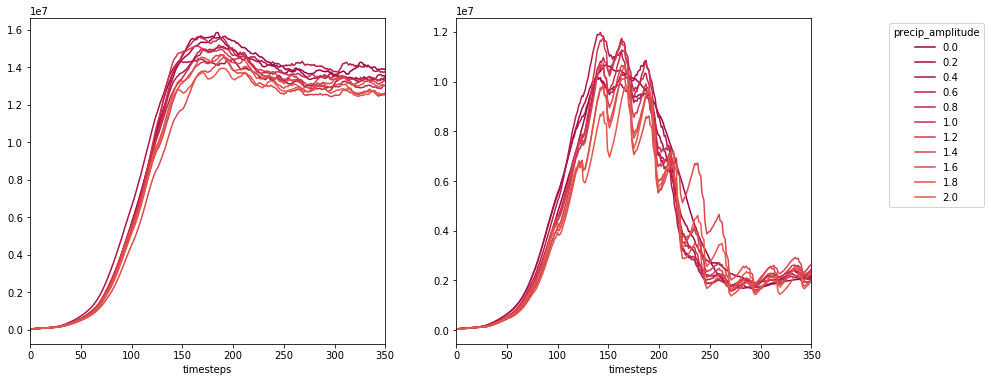

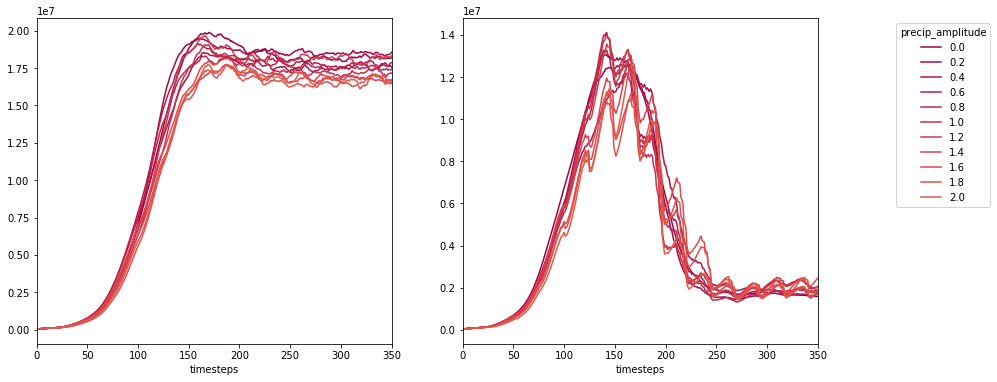

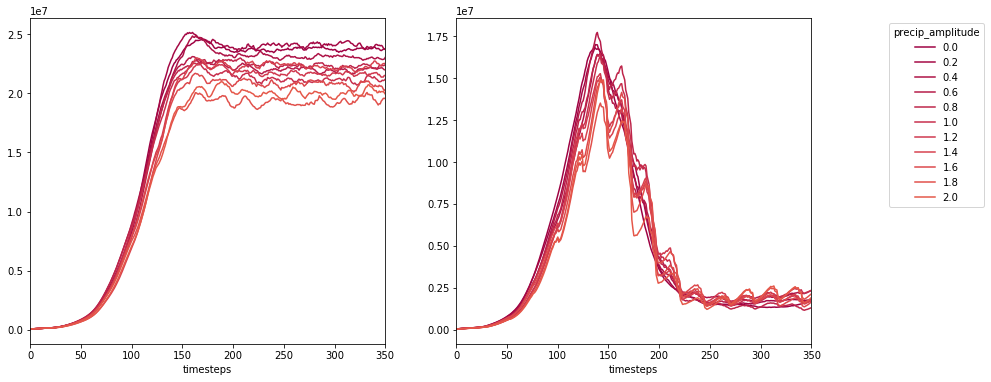

In [87]:
for ts in trade_strengths:
    key=[False, 'total_population', ts]
    level=['kill_cropless', 'observables', 'r_trade']
    unstack = ['precip_amplitude']

    plotlines(data, level, key, unstack)

Answer: for trade strength between 5000 and 10.000 the answer is no. There is no value that leads to diverging trajectories for different values of climate variability.
To clarify this picture, I will continue to test with lower values of trade income.

What one can observe in this experiment is the following: 
* *without killing of settlements without agriculture* the overshoot decreases with increasing income from trade,
* *with killing of settlements without agriculture* the overshot increases with increasing income from trade.


I suspect the reason behind this is, that in the first case, income from agriculture can be substituted with income from trade whereas in the second case, this is impossible.

To understand the situation better, lets check the underlying hypothesis, that decline in income from ecosystems and agriculture leads to decline in income from trade:

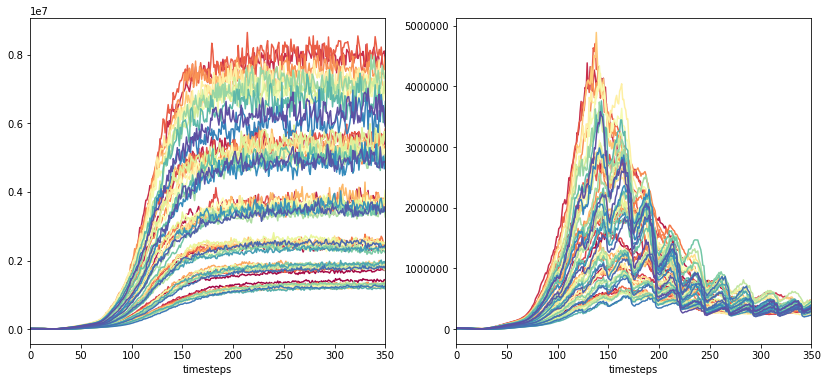

In [88]:
key=[False, 'total_income_trade']
level=['kill_cropless', 'observables']
unstack = ['r_trade', 'precip_amplitude']

plotlines(data, level, key, unstack, legend=False)

This shows that there is variability in income from trade, yet climate variability has no. This is weird.
I should check especially on the dynamics of trading settlements next...